In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from scipy.linalg import khatri_rao

#for debug
import time as tm
import matplotlib.pyplot as plt


In [8]:
train_data = np.loadtxt("train.dat", delimiter=" ")
trainX, trainY = train_data.transpose()[:-1].transpose(), train_data.transpose()[-1].transpose()

test_data = np.loadtxt("test.dat", delimiter=" ")
testX, testY = test_data.transpose()[:-1].transpose(), test_data.transpose()[-1].transpose()

In [12]:
# c mapped to phi(c) as given in lecture ppt


In [9]:

def my_map(X):
    X = 1 - 2* np.array(X)
    X = np.cumprod(X[:, ::-1], axis=1)[:, ::-1].transpose()
    return np.concatenate((khatri_rao(X, X), X), axis = 0).transpose()

# def my_fit(X, Y):


In [10]:
trainX.shape, trainY.shape

((40000, 32), (40000,))

In [44]:
def my_fit(X_train, Y_train, method , c):
    phi_X = my_map(X_train)
    if method == "LogisticRegression":
        model = LogisticRegression(C= c, solver='lbfgs', penalty='l2') #7.2326338964835335
    else:
        # model = LinearSVC(C = 3.4304692863149193, loss='squared_hinge', dual=False)
        model = LinearSVC(C = c, loss="squared_hinge", dual=False)
    model.fit(phi_X, np.array(Y_train))
    return model
    # return model.coef_.transpose(), model.intercept_


In [41]:
def get_accuracy(l, c):

    tic = tm.perf_counter()
    best_model = my_fit(trainX, trainY, l, c)
    toc = tm.perf_counter()
    y_pred = best_model.predict(my_map(testX))

    accuracy = np.mean(y_pred == testY)
    return accuracy, toc - tic

# loss = ['hinge', 'squared_hinge']
# final_accs, final_times = [], []
# for l in loss:

#     accs, times = [], []
#     C = np.logspace(-3, 4, 50)
#     for i, c in enumerate(C):
#         print(i)
#         res = get_accuracy(l, c)
#         accs.append(res[0])
#         times.append(res[1])
#     final_accs.append(accs)
#     final_times.append(times)

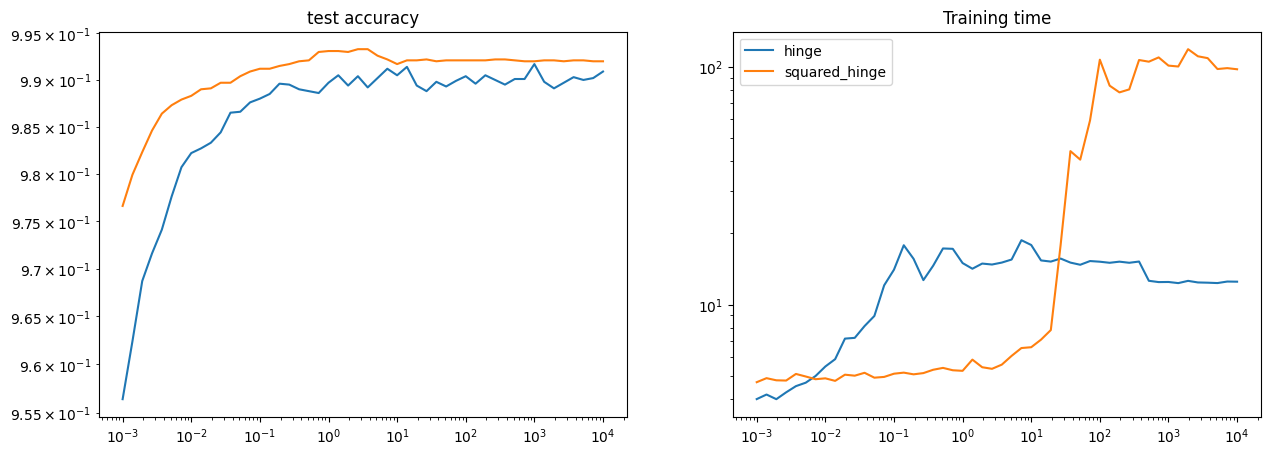

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].loglog(C, final_accs[0], label="Hinge")
ax[0].loglog(C, final_accs[1], label="squared_hinge")

ax[0].set_title("test accuracy")

ax[1].loglog(C, final_times[0], label="hinge")
ax[1].loglog(C, final_times[1], label="squared_hinge")

ax[1].set_title("Training time")
plt.legend()
plt.show()


In [28]:
final_accs[1]

[0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934,
 0.9934]

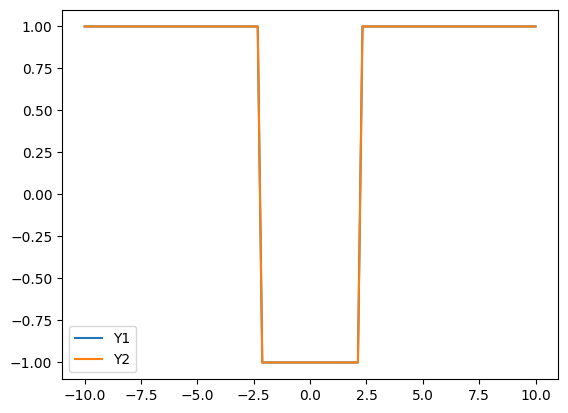

In [ ]:
X = np.linspace(-10, 10, 100)
Y1 = np.sign(np.abs(X) - 2.28)
Y2 = np.sign((X - 2.28) * (X + 2.28))
plt.plot(X, Y1, label = 'Y1')
plt.plot(X, Y2, label='Y2')
plt.legend()
plt.show()

In [39]:
import json

training_statistics = {
    "C_values":list(C),
    "hinge":{
        "accuracy":final_accs[0],
        "training_time":final_times[0]
    },
    "square_hinge":{
        "accuracy":final_accs[1],
        "training_time":final_times[1]
    }
}

with open("Q3a.json", "w") as outfile: 
    outfile.write(json.dumps(training_statistics, indent=4))

In [48]:
methods = ["LinearSVC", "LogisticRegression"]
final_accs, final_times = [], []
for method in methods:

    accs, times = [], []
    C = np.logspace(-3, 4, 25)
    for i, c in enumerate(C):
        print(i)
        res = get_accuracy(method, c)
        accs.append(res[0])
        times.append(res[1])
    final_accs.append(accs)
    final_times.append(times)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


c:\Users\adith\OneDrive\Desktop\textbooks\sem8\CS771\assn1\solution\my_env\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


20


c:\Users\adith\OneDrive\Desktop\textbooks\sem8\CS771\assn1\solution\my_env\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


21
22


c:\Users\adith\OneDrive\Desktop\textbooks\sem8\CS771\assn1\solution\my_env\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


23
24


c:\Users\adith\OneDrive\Desktop\textbooks\sem8\CS771\assn1\solution\my_env\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


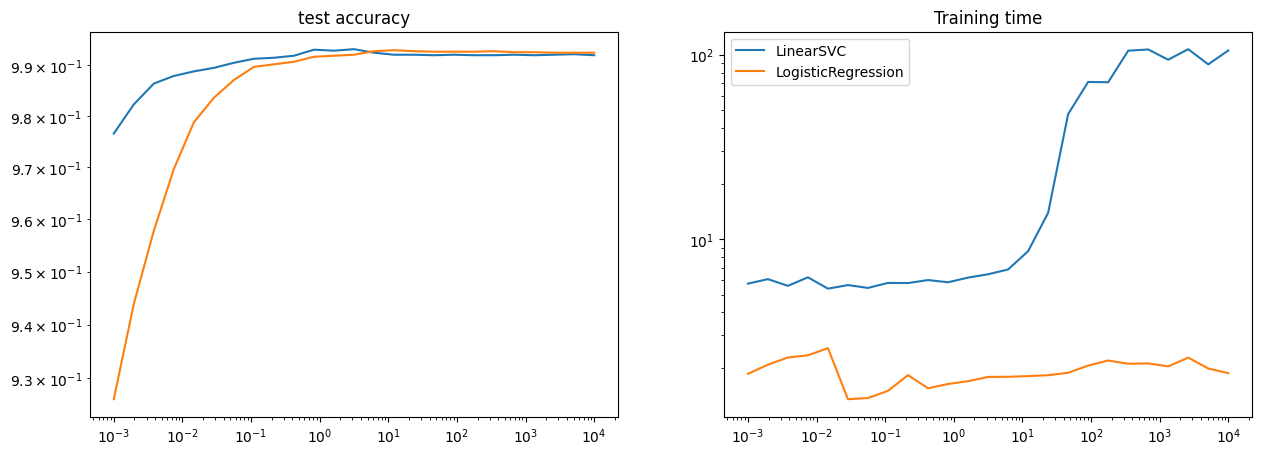

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].loglog(C, final_accs[0], label=methods[0])
ax[0].loglog(C, final_accs[1], label=methods[1])

ax[0].set_title("test accuracy")
plt.legend()
ax[1].loglog(C, final_times[0], label=methods[0])
ax[1].loglog(C, final_times[1], label=methods[1])

ax[1].set_title("Training time")
plt.legend()
plt.show()


In [ ]:
import json

training_statistics = {
    "C_values":list(C),
    "LinearSVC":{
        "accuracy":final_accs[0],
        "training_time":final_times[0]
    },
    "LogisticRegression":{
        "accuracy":final_accs[1],
        "training_time":final_times[1]
    }
}

with open("Q3b.json", "w") as outfile: 
    outfile.write(json.dumps(training_statistics, indent=4))